# **APS360 Project**
#**Live Gesture Recognition Model for Emoji Choice**

Andrew Lam, Dan Kim, Marie Floryan

# **Section 1: Retrieving Dataset**


LINK TO LIVE FEED APPLICATION CODE: https://github.com/donghee214/gesture-recognition

**Data Processing**


Each group member will get 105 samples of each emoji, for a total of 315 samples total of each emoji. 


Of the 105 samples from each person:
35 pictures will be taken in dark, neutral, and bright lighting.

White background will be used.
Pictures resized to 224x224.
Hand is centered in the center of the image.

Data labelling:
“Image number”_”lighting”_”emoji name”


Marie: 1-105


Dan: 106-210

Andrew: 211-315

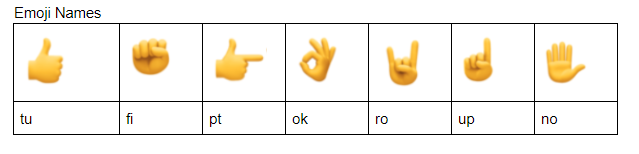


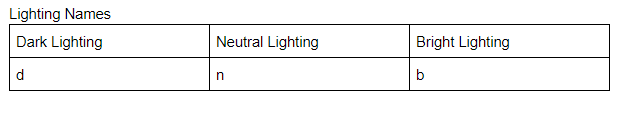


**1.1 Data Loading**

In [ ]:
#Andrew

#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


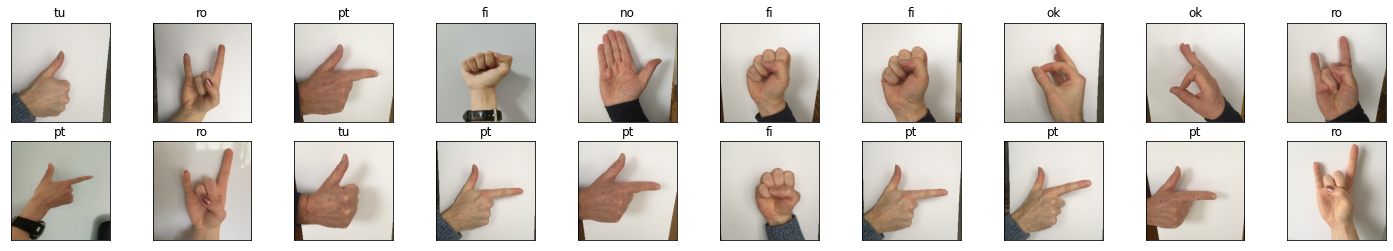

In [ ]:
# Andrew


#Loading Gesture Images from Google Drive

import torch
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# location on Google Drive
train_path = '/content/gdrive/My Drive/hand_gesture_dataset/train'
valid_path = '/content/gdrive/My Drive/hand_gesture_dataset/valid'
test_path = '/content/gdrive/My Drive/hand_gesture_dataset/test'
overfit_path = '/content/gdrive/My Drive/hand_gesture_dataset/overfit'

# Transform Settings - Do not use RandomResizedCrop
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

# Load data from Google Drive
trainset = torchvision.datasets.ImageFolder(train_path, transform=transform)
valset = torchvision.datasets.ImageFolder(valid_path, transform=transform)
testset = torchvision.datasets.ImageFolder(test_path, transform=transform)

# Prepare Dataloader
data_size = len(trainset)
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of images
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['fi', 'no', 'ok', 'pt', 'ro', 'tu', 'up']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

**1.2 Splitting Dataset**

In [ ]:
# 315 images for each emoji

# 40/40/20 split? 

# so 126/126/63 for each emoji  #126 isnt alot for the training... maybe could do a 50/30/20 split? but dunno if this will have a big effect or not

# 882/882/441
batch_size = 64
num_workers = 1
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, num_workers=num_workers, shuffle=True)


# **Section 2: Building Model**


In [ ]:
###### BASELINE MODEL #######

#https://www.geeksforgeeks.org/python-image-classification-using-keras/

# importing libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
  
  
img_width, img_height = 224, 224
  
train_data_dir = train_path
validation_data_dir = valid_path
nb_train_samples = 875 
nb_validation_samples = 875
epochs = 10
batch_size = 16
  
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 
  
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(7)) 
model.add(Activation('softmax')) 
  
model.compile(loss ='sparse_categorical_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 
  
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='sparse') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='sparse') 
  
model.fit_generator(train_generator, 
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size) 

In [ ]:
#Andrew

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import time
torch.manual_seed(1) # set the random seed



class Emoji_Classifier(nn.Module):
      def __init__(self):
          super(Emoji_Classifier, self).__init__()
          self.name = "net"
          self.conv1 = nn.Conv2d(3, 10, 5, 2) #in_channels, out_chanels, kernel_size
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
          self.conv2 = nn.Conv2d(10, 26, 5, 2) #in_channels, out_chanels, kernel_size
          self.fc1 = nn.Linear(26 * 13 * 13, 120)
          self.fc2 = nn.Linear(120, 8)

      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 26 * 13 * 13)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          x = x.squeeze(1) #Flatten to batch size
          return x

# **Section 3: Training & Hyperparameters**

**3.1 Training**

In [ ]:
#Marie
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
       # if use_cuda and torch.cuda.is_available():
        #      data = data.cuda()
        inputs, labels = data
        if use_cuda and torch.cuda.is_available():
              labels = labels.cuda()
              inputs = inputs.cuda()
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

In [ ]:
#Marie
def train(model, use_cuda, train_loader, val_loader, batch_size=27, num_epochs=1, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, losses, train_acc, val_acc, val_loss = [], [], [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1    
        # track accuracy
        iters.append(n)
        losses.append(float(loss)/batch_size)
        train_acc.append(get_accuracy(model, train_loader, use_cuda))
        val_acc.append(get_accuracy(model, val_loader, use_cuda))
        #val_loss.append(evaluate(model, val_loader, criterion))
        print(("Epoch {}: Train acc: {}, Train loss: {} |"+
               "Validation acc: {}").format(
                   epoch + 1,
                   train_acc[-1],
                   losses[-1],
                   val_acc[-1]))

        # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    #plt.plot(iters, val_loss, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    #plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))     
    return train_acc, val_acc

In [ ]:
#Marie
def get_accuracy(model, data_loader, use_cuda):
    correct = 0
    total = 0

    for imgs, labels in data_loader:
        
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

Training Started...
Epoch 1: Train acc: 0.43542857142857144, Train loss: 0.0603715144097805 |Validation acc: 0.317351598173516
Epoch 2: Train acc: 0.6411428571428571, Train loss: 0.04671018570661545 |Validation acc: 0.589041095890411
Epoch 3: Train acc: 0.6605714285714286, Train loss: 0.030530737712979317 |Validation acc: 0.589041095890411
Epoch 4: Train acc: 0.8045714285714286, Train loss: 0.023528989404439926 |Validation acc: 0.7031963470319634
Epoch 5: Train acc: 0.8274285714285714, Train loss: 0.01590462401509285 |Validation acc: 0.6484018264840182
Epoch 6: Train acc: 0.8708571428571429, Train loss: 0.013905389234423637 |Validation acc: 0.6678082191780822
Epoch 7: Train acc: 0.8982857142857142, Train loss: 0.008163745515048504 |Validation acc: 0.6963470319634704
Epoch 8: Train acc: 0.9348571428571428, Train loss: 0.007800034247338772 |Validation acc: 0.797945205479452
Epoch 9: Train acc: 0.9485714285714286, Train loss: 0.010529398918151855 |Validation acc: 0.8105022831050228
Epoch 

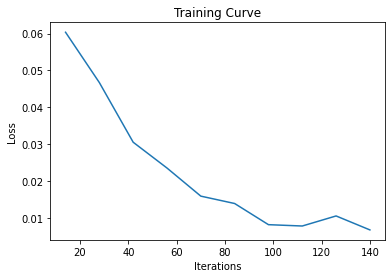

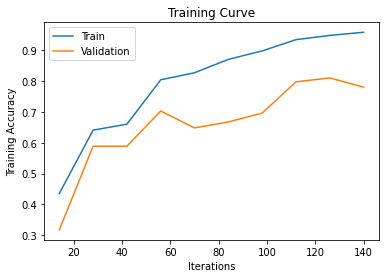

Final Training Accuracy: 0.9588571428571429
Final Validation Accuracy: 0.7808219178082192


FileNotFoundError: ignored

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
# use_cuda set to false
train(model, True, train_loader, val_loader, batch_size= 32, num_epochs= 10, learn_rate=0.001)

# Dan - save & export the model 
torch.save(model.state_dict(), "/content/gdrive/My Drive/trained_model/model_dict")
torch.save(model, "/content/gdrive/My Drive/trained_model/model")

In [ ]:

get_accuracy(model, val_loader, use_cuda)

0.8721461187214612

**3.2 “Overfit” to a Small Dataset**

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
#Marie
def overtrain(model, use_cuda, train_loader, batch_size=27, num_epochs=1, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, losses, train_acc, val_acc, val_loss = [], [], [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1    
        # track accuracy
        iters.append(n)
        losses.append(float(loss)/batch_size)
        train_acc.append(get_accuracy(model, train_loader, use_cuda))
        #val_acc.append(get_accuracy(model, val_loader, use_cuda))
        #val_loss.append(evaluate(model, val_loader, criterion))
        print(("Epoch {}: Train acc: {}, Train loss: {} |").format(epoch + 1,train_acc[-1], losses[-1]))

        # plotting
    
    plt.title("Overfitting Training Loss Curve")
    plt.plot(iters, losses, label="Train")
    #plt.plot(iters, val_loss, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    #plt.legend(loc='best')
    plt.show()

    plt.title("Overfitting Training Accuracy Curve")
    plt.plot(iters, train_acc, label="Train")
    #plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    #print("Final Validation Accuracy: {}".format(val_acc[-1]))     
    return train_acc,

Training Started...
Epoch 1: Train acc: 0.14285714285714285, Train loss: 0.07723063009756582 |
Epoch 2: Train acc: 0.14285714285714285, Train loss: 0.0745791064368354 |
Epoch 3: Train acc: 0.14285714285714285, Train loss: 0.07198758478517886 |
Epoch 4: Train acc: 0.14285714285714285, Train loss: 0.0716888463055646 |
Epoch 5: Train acc: 0.38095238095238093, Train loss: 0.07224939046082673 |
Epoch 6: Train acc: 0.2857142857142857, Train loss: 0.07020178547611942 |
Epoch 7: Train acc: 0.2857142857142857, Train loss: 0.06919845828303585 |
Epoch 8: Train acc: 0.5714285714285714, Train loss: 0.06754767011713099 |
Epoch 9: Train acc: 0.38095238095238093, Train loss: 0.06594522352571841 |
Epoch 10: Train acc: 0.5238095238095238, Train loss: 0.06378922639069734 |
Epoch 11: Train acc: 0.42857142857142855, Train loss: 0.06014031834072537 |
Epoch 12: Train acc: 0.9047619047619048, Train loss: 0.05609686286361129 |
Epoch 13: Train acc: 0.7619047619047619, Train loss: 0.049907313452826604 |
Epoch 14

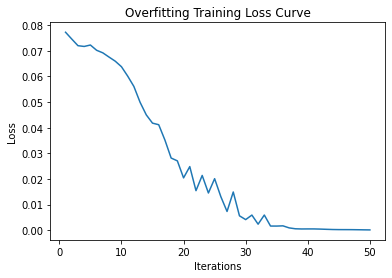

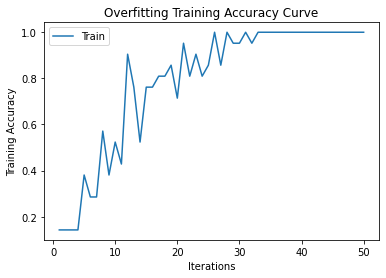

Final Training Accuracy: 1.0


([0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.38095238095238093,
  0.2857142857142857,
  0.2857142857142857,
  0.5714285714285714,
  0.38095238095238093,
  0.5238095238095238,
  0.42857142857142855,
  0.9047619047619048,
  0.7619047619047619,
  0.5238095238095238,
  0.7619047619047619,
  0.7619047619047619,
  0.8095238095238095,
  0.8095238095238095,
  0.8571428571428571,
  0.7142857142857143,
  0.9523809523809523,
  0.8095238095238095,
  0.9047619047619048,
  0.8095238095238095,
  0.8571428571428571,
  1.0,
  0.8571428571428571,
  1.0,
  0.9523809523809523,
  0.9523809523809523,
  1.0,
  0.9523809523809523,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],)

In [ ]:
#Marie
over_dataset = torchvision.datasets.ImageFolder(overfit_path, transform=transform) #will need to make an "Overfit" image folder

# Prepare Dataloader
batch_size = 27
num_workers = 1

over_loader = torch.utils.data.DataLoader(over_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
model = Emoji_Classifier()
model.cuda()

overtrain(model, True, over_loader, batch_size=27, num_epochs = 50, learn_rate=0.0025)

**3.3 Hyperparameter Search**

ERROR! Session/line number was not unique inTraining Started... database. History logging moved to new session
 59
Epoch 1: Train acc: 0.29714285714285715, Train loss: 0.02775106579065323 |Validation acc: 0.3093607305936073
Epoch 2: Train acc: 0.6697142857142857, Train loss: 0.01756361499428749 |Validation acc: 0.4988584474885845
Epoch 3: Train acc: 0.6057142857142858, Train loss: 0.014356940053403378 |Validation acc: 0.5228310502283106
Epoch 4: Train acc: 0.7851428571428571, Train loss: 0.008757490664720535 |Validation acc: 0.6689497716894978
Epoch 5: Train acc: 0.8537142857142858, Train loss: 0.008340565487742424 |Validation acc: 0.632420091324201
Epoch 6: Train acc: 0.9085714285714286, Train loss: 0.00556383840739727 |Validation acc: 0.7431506849315068
Epoch 7: Train acc: 0.8948571428571429, Train loss: 0.0037009345833212137 |Validation acc: 0.5513698630136986
Epoch 8: Train acc: 0.936, Train loss: 0.0033488026820123196 |Validation acc: 0.6769406392694064
Epoch 9: Train acc: 0.92571

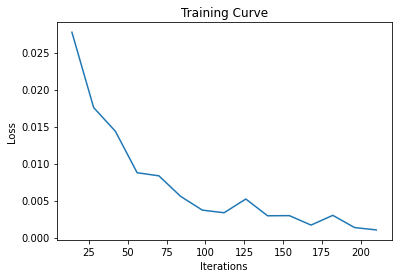

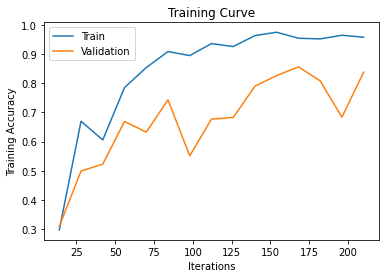

Final Training Accuracy: 0.9577142857142857
Final Validation Accuracy: 0.8378995433789954


([0.29714285714285715,
  0.6697142857142857,
  0.6057142857142858,
  0.7851428571428571,
  0.8537142857142858,
  0.9085714285714286,
  0.8948571428571429,
  0.936,
  0.9257142857142857,
  0.9634285714285714,
  0.9748571428571429,
  0.9542857142857143,
  0.952,
  0.9645714285714285,
  0.9577142857142857],
 [0.3093607305936073,
  0.4988584474885845,
  0.5228310502283106,
  0.6689497716894978,
  0.632420091324201,
  0.7431506849315068,
  0.5513698630136986,
  0.6769406392694064,
  0.682648401826484,
  0.7899543378995434,
  0.8264840182648402,
  0.8561643835616438,
  0.8082191780821918,
  0.6837899543378996,
  0.8378995433789954])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 15, learn_rate=0.001)

Training Started...
Epoch 1: Train acc: 0.48342857142857143, Train loss: 0.026815339922904968 |Validation acc: 0.432648401826484
Epoch 2: Train acc: 0.6994285714285714, Train loss: 0.015126705169677734 |Validation acc: 0.45662100456621
Epoch 3: Train acc: 0.7702857142857142, Train loss: 0.011632008478045464 |Validation acc: 0.7031963470319634
Epoch 4: Train acc: 0.84, Train loss: 0.006991459988057613 |Validation acc: 0.70662100456621
Epoch 5: Train acc: 0.8697142857142857, Train loss: 0.003880756441503763 |Validation acc: 0.6221461187214612
Epoch 6: Train acc: 0.9222857142857143, Train loss: 0.00733964191749692 |Validation acc: 0.8036529680365296
Epoch 7: Train acc: 0.888, Train loss: 0.0028152428567409515 |Validation acc: 0.5616438356164384
Epoch 8: Train acc: 0.912, Train loss: 0.0040197246707975864 |Validation acc: 0.7865296803652968
Epoch 9: Train acc: 0.9531428571428572, Train loss: 0.0033927857875823975 |Validation acc: 0.7968036529680366
Epoch 10: Train acc: 0.9794285714285714, 

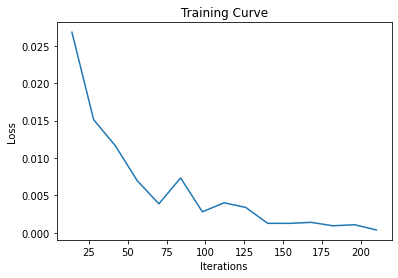

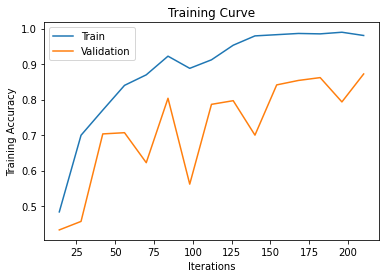

Final Training Accuracy: 0.9805714285714285
Final Validation Accuracy: 0.8721461187214612


([0.48342857142857143,
  0.6994285714285714,
  0.7702857142857142,
  0.84,
  0.8697142857142857,
  0.9222857142857143,
  0.888,
  0.912,
  0.9531428571428572,
  0.9794285714285714,
  0.9828571428571429,
  0.9862857142857143,
  0.9851428571428571,
  0.9897142857142858,
  0.9805714285714285],
 [0.432648401826484,
  0.45662100456621,
  0.7031963470319634,
  0.70662100456621,
  0.6221461187214612,
  0.8036529680365296,
  0.5616438356164384,
  0.7865296803652968,
  0.7968036529680366,
  0.6997716894977168,
  0.841324200913242,
  0.8538812785388128,
  0.8618721461187214,
  0.79337899543379,
  0.8721461187214612])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 15, learn_rate=0.0025)

Training Started...
Epoch 1: Train acc: 0.504, Train loss: 0.021580331027507782 |Validation acc: 0.4474885844748858
Epoch 2: Train acc: 0.7337142857142858, Train loss: 0.011028440669178963 |Validation acc: 0.5810502283105022
Epoch 3: Train acc: 0.8331428571428572, Train loss: 0.009103440679609776 |Validation acc: 0.7659817351598174
Epoch 4: Train acc: 0.8994285714285715, Train loss: 0.004456705413758755 |Validation acc: 0.7876712328767124
Epoch 5: Train acc: 0.9382857142857143, Train loss: 0.002652206690981984 |Validation acc: 0.8744292237442922
Epoch 6: Train acc: 0.9417142857142857, Train loss: 0.004776135552674532 |Validation acc: 0.8127853881278538
Epoch 7: Train acc: 0.9188571428571428, Train loss: 0.0019998846109956503 |Validation acc: 0.7408675799086758
Epoch 8: Train acc: 0.9828571428571429, Train loss: 0.002469582250341773 |Validation acc: 0.839041095890411
Epoch 9: Train acc: 0.9817142857142858, Train loss: 0.0025479879695922136 |Validation acc: 0.8481735159817352
Epoch 10: T

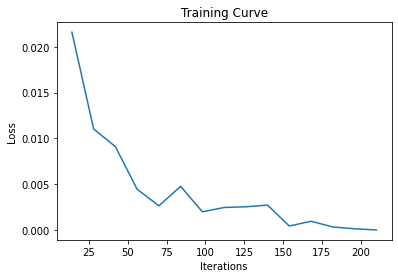

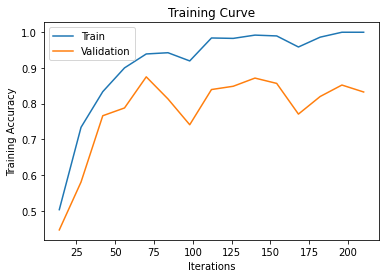

Final Training Accuracy: 0.9988571428571429
Final Validation Accuracy: 0.8321917808219178


([0.504,
  0.7337142857142858,
  0.8331428571428572,
  0.8994285714285715,
  0.9382857142857143,
  0.9417142857142857,
  0.9188571428571428,
  0.9828571428571429,
  0.9817142857142858,
  0.9908571428571429,
  0.9885714285714285,
  0.9577142857142857,
  0.9851428571428571,
  0.9988571428571429,
  0.9988571428571429],
 [0.4474885844748858,
  0.5810502283105022,
  0.7659817351598174,
  0.7876712328767124,
  0.8744292237442922,
  0.8127853881278538,
  0.7408675799086758,
  0.839041095890411,
  0.8481735159817352,
  0.8710045662100456,
  0.8561643835616438,
  0.7705479452054794,
  0.819634703196347,
  0.8515981735159818,
  0.8321917808219178])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 15, learn_rate=0.003)

Training Started...
Epoch 1: Train acc: 0.2925714285714286, Train loss: 0.029386894777417183 |Validation acc: 0.2899543378995434
Epoch 2: Train acc: 0.6468571428571429, Train loss: 0.018619675189256668 |Validation acc: 0.4634703196347032
Epoch 3: Train acc: 0.7074285714285714, Train loss: 0.011830698698759079 |Validation acc: 0.5057077625570776
Epoch 4: Train acc: 0.7737142857142857, Train loss: 0.007856189273297787 |Validation acc: 0.6655251141552512
Epoch 5: Train acc: 0.8628571428571429, Train loss: 0.004940753802657127 |Validation acc: 0.7488584474885844
Epoch 6: Train acc: 0.9291428571428572, Train loss: 0.0049141631461679935 |Validation acc: 0.8299086757990868
Epoch 7: Train acc: 0.9485714285714286, Train loss: 0.0029410519637167454 |Validation acc: 0.819634703196347
Epoch 8: Train acc: 0.9611428571428572, Train loss: 0.0017998586408793926 |Validation acc: 0.8356164383561644
Epoch 9: Train acc: 0.9897142857142858, Train loss: 0.001913320505991578 |Validation acc: 0.89611872146118

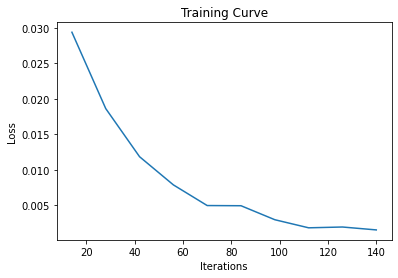

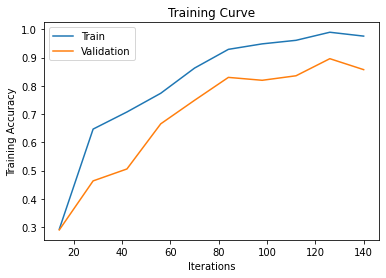

Final Training Accuracy: 0.976
Final Validation Accuracy: 0.8573059360730594


([0.2925714285714286,
  0.6468571428571429,
  0.7074285714285714,
  0.7737142857142857,
  0.8628571428571429,
  0.9291428571428572,
  0.9485714285714286,
  0.9611428571428572,
  0.9897142857142858,
  0.976],
 [0.2899543378995434,
  0.4634703196347032,
  0.5057077625570776,
  0.6655251141552512,
  0.7488584474885844,
  0.8299086757990868,
  0.819634703196347,
  0.8356164383561644,
  0.8961187214611872,
  0.8573059360730594])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 10, learn_rate=0.004)

In [ ]:
get_accuracy(model, val_loader, use_cuda)

0.8573059360730594

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 15, learn_rate=0.005)

Training Started...
Epoch 1: Train acc: 0.6697142857142857, Train loss: 0.04268909990787506 |Validation acc: 0.5468036529680366
Epoch 2: Train acc: 0.7062857142857143, Train loss: 0.023533163592219353 |Validation acc: 0.6232876712328768
Epoch 3: Train acc: 0.7451428571428571, Train loss: 0.02053428441286087 |Validation acc: 0.6598173515981736
Epoch 4: Train acc: 0.8982857142857142, Train loss: 0.009779278188943863 |Validation acc: 0.7488584474885844
Epoch 5: Train acc: 0.9097142857142857, Train loss: 0.005969882011413574 |Validation acc: 0.83675799086758
Epoch 6: Train acc: 0.9428571428571428, Train loss: 0.012151048518717289 |Validation acc: 0.797945205479452
Epoch 7: Train acc: 0.944, Train loss: 0.003059407928958535 |Validation acc: 0.7248858447488584
Epoch 8: Train acc: 0.9771428571428571, Train loss: 0.005022657569497824 |Validation acc: 0.8321917808219178
Epoch 9: Train acc: 0.9782857142857143, Train loss: 0.0023977903183549643 |Validation acc: 0.8333333333333334
Epoch 10: Train 

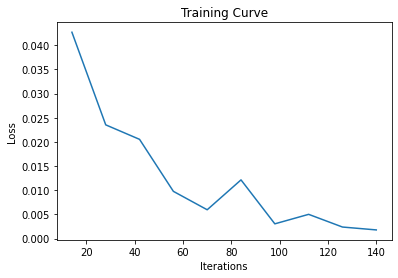

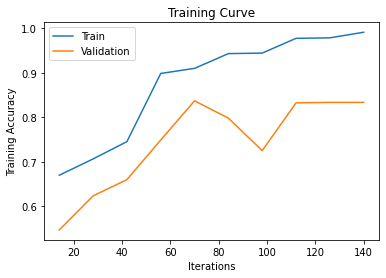

Final Training Accuracy: 0.9908571428571429
Final Validation Accuracy: 0.8333333333333334


([0.6697142857142857,
  0.7062857142857143,
  0.7451428571428571,
  0.8982857142857142,
  0.9097142857142857,
  0.9428571428571428,
  0.944,
  0.9771428571428571,
  0.9782857142857143,
  0.9908571428571429],
 [0.5468036529680366,
  0.6232876712328768,
  0.6598173515981736,
  0.7488584474885844,
  0.83675799086758,
  0.797945205479452,
  0.7248858447488584,
  0.8321917808219178,
  0.8333333333333334,
  0.8333333333333334])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 32, num_epochs= 10, learn_rate=0.004)

Training Started...
Epoch 1: Train acc: 0.17257142857142857, Train loss: 0.030189212411642075 |Validation acc: 0.16095890410958905
Epoch 2: Train acc: 0.4674285714285714, Train loss: 0.022675175219774246 |Validation acc: 0.4075342465753425
Epoch 3: Train acc: 0.688, Train loss: 0.013496498577296734 |Validation acc: 0.6015981735159818
Epoch 4: Train acc: 0.744, Train loss: 0.009385349228978157 |Validation acc: 0.6050228310502284
Epoch 5: Train acc: 0.8731428571428571, Train loss: 0.005186464637517929 |Validation acc: 0.795662100456621
Epoch 6: Train acc: 0.8742857142857143, Train loss: 0.007351940497756004 |Validation acc: 0.7420091324200914
Epoch 7: Train acc: 0.92, Train loss: 0.0038937516510486603 |Validation acc: 0.8116438356164384
Epoch 8: Train acc: 0.9314285714285714, Train loss: 0.003998168744146824 |Validation acc: 0.8424657534246576
Epoch 9: Train acc: 0.9131428571428571, Train loss: 0.003524224739521742 |Validation acc: 0.8207762557077626
Epoch 10: Train acc: 0.96342857142857

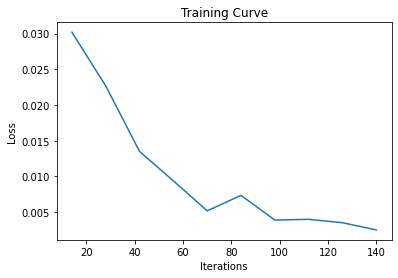

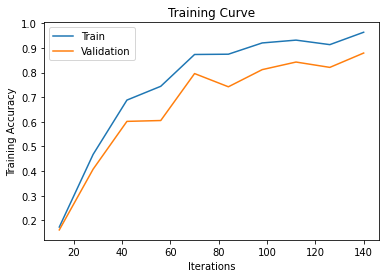

Final Training Accuracy: 0.9634285714285714
Final Validation Accuracy: 0.8789954337899544


([0.17257142857142857,
  0.4674285714285714,
  0.688,
  0.744,
  0.8731428571428571,
  0.8742857142857143,
  0.92,
  0.9314285714285714,
  0.9131428571428571,
  0.9634285714285714],
 [0.16095890410958905,
  0.4075342465753425,
  0.6015981735159818,
  0.6050228310502284,
  0.795662100456621,
  0.7420091324200914,
  0.8116438356164384,
  0.8424657534246576,
  0.8207762557077626,
  0.8789954337899544])

In [ ]:
model = Emoji_Classifier()
model.cuda()
use_cuda = True
train(model, use_cuda, train_loader, val_loader, batch_size= 64, num_epochs= 10, learn_rate=0.004)

In [ ]:
evaluate(model, test_loader, )

ValueError: ignored

In [ ]:
evaluate(model, test_loader, use_cuda)

0.9751131221719457